### Import packages
Import necessry packages needed

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

# Notebook Import statements

from Planar_data_classification_lab_2_1 import*
from Planar_data_classification_lab_2_2 import initialize_parameters, forward_propagation, compute_cost
from Planar_data_classification_lab_2_3 import backward_propagation, update_parameters
from Planar_data_classification_lab_2_4 import nn_model, predict

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!
(400,)
Accuracy of logistic regression: 49 % (percentage of correctly labelled datapoints)
The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4.0
The size of the output layer is: n_y = 2
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
-0.0004997557777419902 -0.000496963353231779 0.0004381874509591466 0.500109546852431
cost = 2.0787596813283797
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.0599014

/Users/pranavjaipurkar/Planar_data_classification_lab_2_2.py:313: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2),Y)+ np.multiply(np.log(1-A2),1-Y)


Cost after iteration 1000: -inf
Cost after iteration 2000: -inf
Cost after iteration 3000: -inf
Cost after iteration 4000: -inf
Cost after iteration 5000: -inf
Cost after iteration 6000: -inf
Cost after iteration 7000: -inf
Cost after iteration 8000: -inf
Cost after iteration 9000: -inf
W1 = [[-4.18493838  5.33220766]
 [-7.52989391  1.24306176]
 [-4.19294361  5.32632492]
 [ 7.52983695 -1.24309437]]
b1 = [[ 2.32926802]
 [ 3.79458981]
 [ 2.33002563]
 [-3.79468893]]
W2 = [[-6033.83672191 -6008.12980658 -6033.10095335  6008.06637573]]
b2 = [[-52.66607682]]
predictions mean = 0.6666666666666666


### Training the model

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.
- Use the `nn_model()` to calculate the model parameters on the X,Y data imported in *lab_2_1*.
- Use the `predict()` to calculate the model predections on X and plot the decision boundries.

Cost after iteration 0: 277.219208
Cost after iteration 1000: 115.233317
Cost after iteration 2000: 101.754198
Cost after iteration 3000: 93.545660
Cost after iteration 4000: 90.716995
Cost after iteration 5000: 89.057710
Cost after iteration 6000: 87.892562
Cost after iteration 7000: 87.001462
Cost after iteration 8000: 87.774904
Cost after iteration 9000: 87.440883


Text(0.5,1,'Decision Boundary for hidden layer size 4')

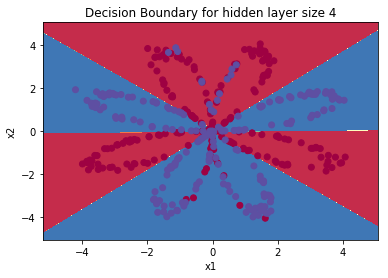

In [2]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [7]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### Tuning hidden layer size  ###

In the following code, populate the *hidden_layer_sizes* list with different values such as $[1, 2, 3, 4, 5, 20, 50]$. It may take few minutes. You will observe different behaviors of the model for various hidden layer sizes.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 91.0 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.5 %
Accuracy for 20 hidden units: 93.0 %
Accuracy for 50 hidden units: 90.25 %


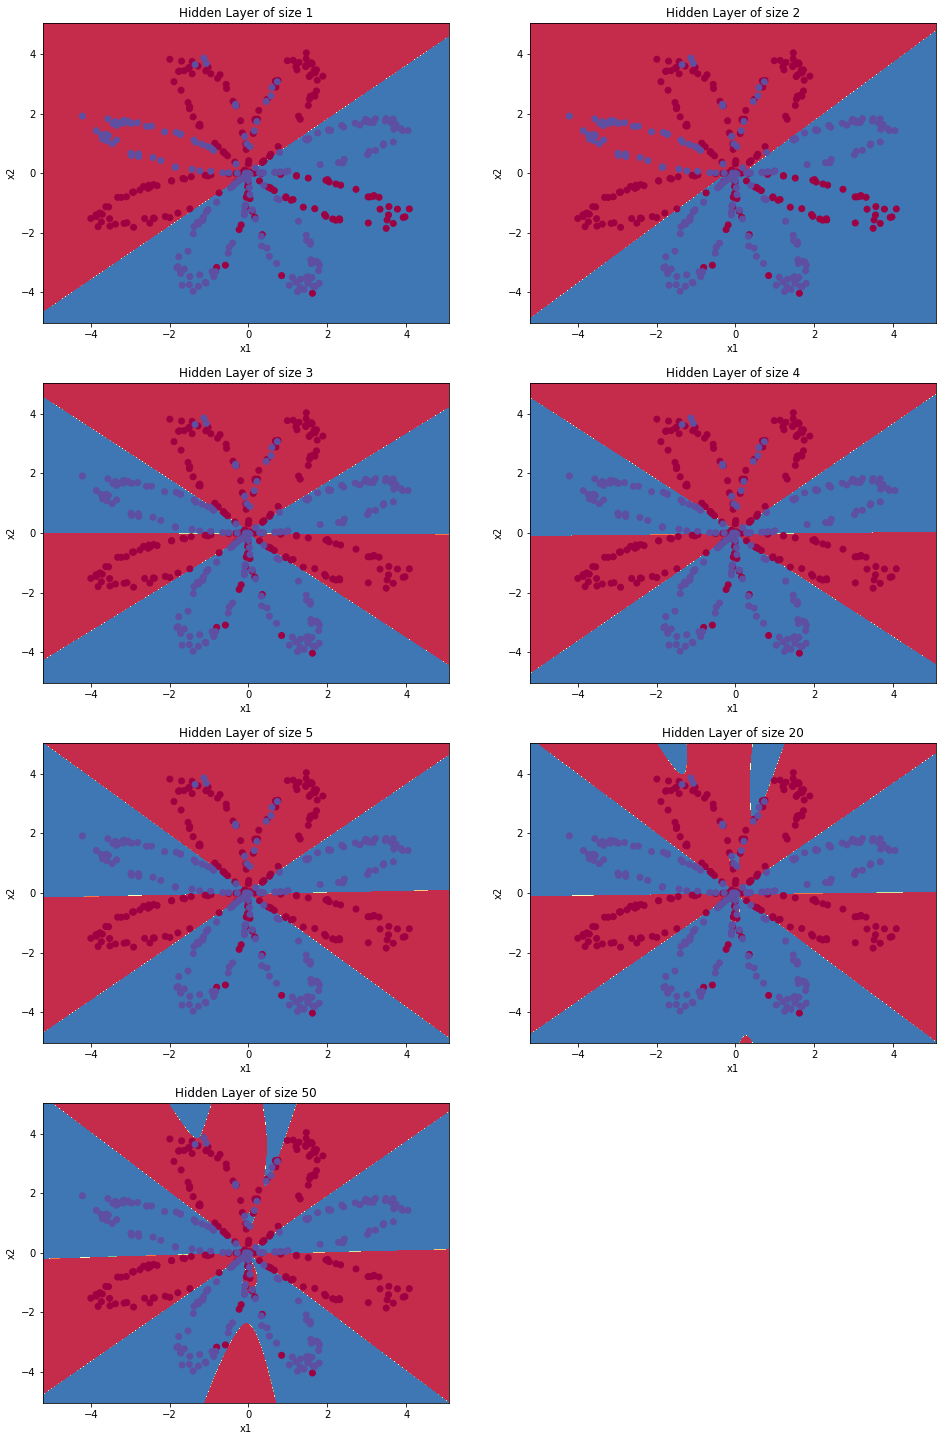

In [8]:
# This may take few minutes to run

plt.figure(figsize=(16, 32))
# populate with different layer size
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 